# 构建卷积并执行池化

**学习内容**
- 什么是卷积
- 如何创建特征图
- 什么是池化

**您将构建的内容**
- 图像的特征图

## 2. 什么是卷积？
卷积是一种过滤条件，可遍历图片、对其进行处理，然后提取重要的特征。

假设您有一幅穿着运动鞋的人的图像。如何检测图像中是否存在运动鞋？为了让您的程序“看到”运动鞋的图像，您必须提取重要的特征，并对不必要的功能进行模糊处理。这称为特征映射。

从理论上说，特征映射过程非常简单。您将扫描图像中的每个像素，然后查看其相邻像素。您需将这些像素的值乘以过滤条件中的等效权重。

例如：

![image](../images/f7b0ab29e09a51f.png)

在这种情况下，系统会指定 3x3 的卷积矩阵或图像内核。

当前的像素值为 192。您可以通过以下方式计算新像素的值：查看邻域值，将其乘以过滤条件中指定的值，并使新像素值设为最终值。

现在，您可以通过对 2D 灰度图像创建基本卷积来探索卷积的工作原理。

您将使用 SciPy 的升序图像来进行演示。这是一个很好的内置图片工具，有许多角度和线条。

## 3. 开始编码
首先导入一些 Python 库和升序图片：

In [20]:
import cv2
import numpy as np
from scipy import misc

i = misc.ascent()
print(i.shape)

(512, 512)


接下来，使用 Pyplot 库 matplotlib 绘制图像，以便您了解图像：

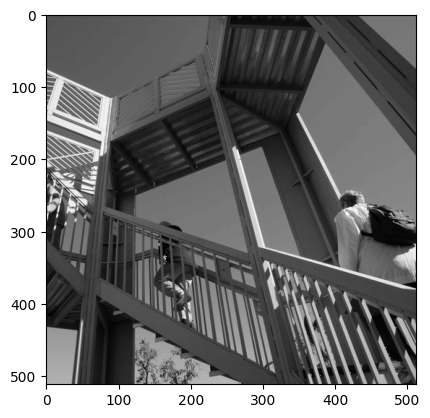

In [18]:
import matplotlib.pyplot as plt
#plt.grid(True)
#plt.gray()
#plt.axis('off')
plt.imshow(i)
plt.show()

您可以看到这是一张楼梯井的图像。您可以尝试并查明大量特征。例如，有很强的垂直线。

图像会存储为 NumPy 数组，因此我们只需复制该数组即可创建转换后的图像。size_x 和 size_y 变量将存储图像的尺寸，以便您稍后循环遍历该图像。

In [11]:
i_transformed = np.copy(i)
#print(i_transformed)
print(i_transformed.shape)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(size_x,size_y)

(512, 512)
512 512


## 4. 创建卷积矩阵

首先，将卷积矩阵（或内核）构建成 3x3 数组：


In [14]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines.
# Experiment with different values for fun effects.
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
 # If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

现在，计算输出像素。迭代图像，保留 1 像素的外边距，并将当前像素的每个邻域乘以该过滤条件中定义的值。

这意味着当前像素的邻近像素和位于左侧的像素将乘以过滤条件中的左上角项。然后，用所得结果乘以权重，确保结果介于 0 到 255 之间。

最后，将新值加载到转换后的图像中：




In [15]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

print(i_transformed)

[[ 83  83  83 ... 117 117 117]
 [ 82   0   0 ...   0   0 117]
 [ 80   0   0 ...   0   0 117]
 ...
 [178   4   4 ...   0   0  57]
 [178   0   0 ...   0   0  57]
 [178 178 178 ...  57  57  58]]


## 5. 查看返回的结果

现在，绘制图像，查看通过过滤条件的效果：

![image](../images/48ff667b2df812ad.png)

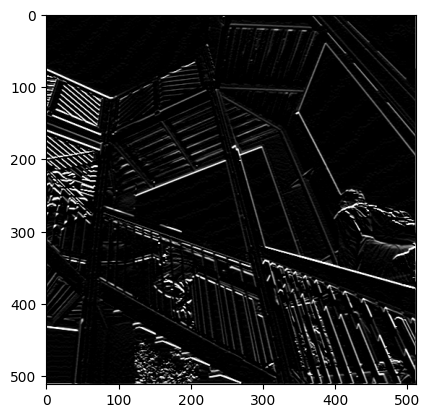

In [16]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

请考虑以下过滤条件值及其对图像的影响。

使用 [-1,0,1,-2,0,2,-1,0,1] 获得一组很强的垂直线：

![image](../images/6f1cc59befac4d33.png)

使用 [-1,-2,-1,0,0,0,1,2,1] 获得水平线：

![image](../images/705ec1004fce21d4.png)

探索不同的值！此外，您还可以尝试其他尺寸的过滤条件，例如 5x5 或 7x7。

## 6. 了解池化

现在，您已确定了图像的基本特征，接下来要做什么？如何使用生成的特征图对图像进行分类？

与卷积类似，池化对特征检测有很大帮助。池化层可减少图像中的所有信息量，同时维持检测到的特征。

池化类型有多种，但您可以使用名为“最大池化”的池化类型。

迭代图片，并在每个点上考虑像素及其右侧、下方和右下方直接邻近像素。取其中最大的（即最大池化），并将其加载到新图像中。因此，新图像的大小将是旧图像的四分之一。

![image](../images/6029904d82700d8e.png)

## 7. 编写池化代码
以下代码将显示 (2, 2) 池化。运行该代码以查看输出。

您会发现，虽然此图像大小是原始大小的四分之一，但保留了所有特征。

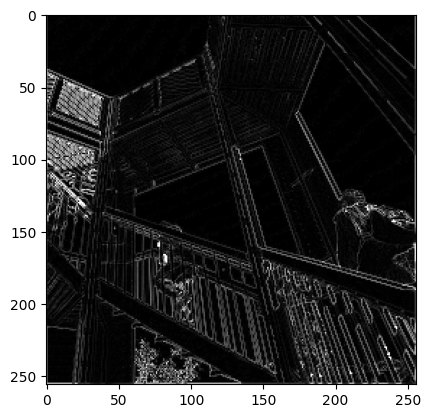

In [15]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

请注意该图表的轴。图像现在的尺寸为 256x256，是原始尺寸的四分之一，尽管现在图像中显示的数据较少，但检测到的特征也得到了增强。

## 8. 恭喜
您已构建了自己的第一个计算机视觉模型！